In [201]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [202]:
# numero de estrellas x simulacion
n_stars_list = [100, 1000, 10000, 100000, 1000000]


In [203]:
# funcion para IMF de kroupa 
def kroupa_imf(m):
    if 0.01 <= m < 0.08:
        return m**(-0.3)
    elif 0.08 <= m < 0.5:
        return m**(-1.3)
    else:
        return m**(-2.3)

In [204]:
def sample_mass_kroupa(n_stars):
    masses = []
    while len(masses) < n_stars:
        # aplicamos probabilidades 
        r = np.random.rand()
        if r < 0.03:  
            m = np.random.uniform(0.01, 0.08)
        elif r < 0.25:  
            m = np.random.uniform(0.08, 0.5)
        else:  
            m = np.random.uniform(0.5, 100)

        if np.random.rand() < kroupa_imf(m):
            masses.append(m)
    return np.array(masses)

In [205]:
masas_list = [sample_mass_kroupa(n_stars) for n_stars in n_stars_list]


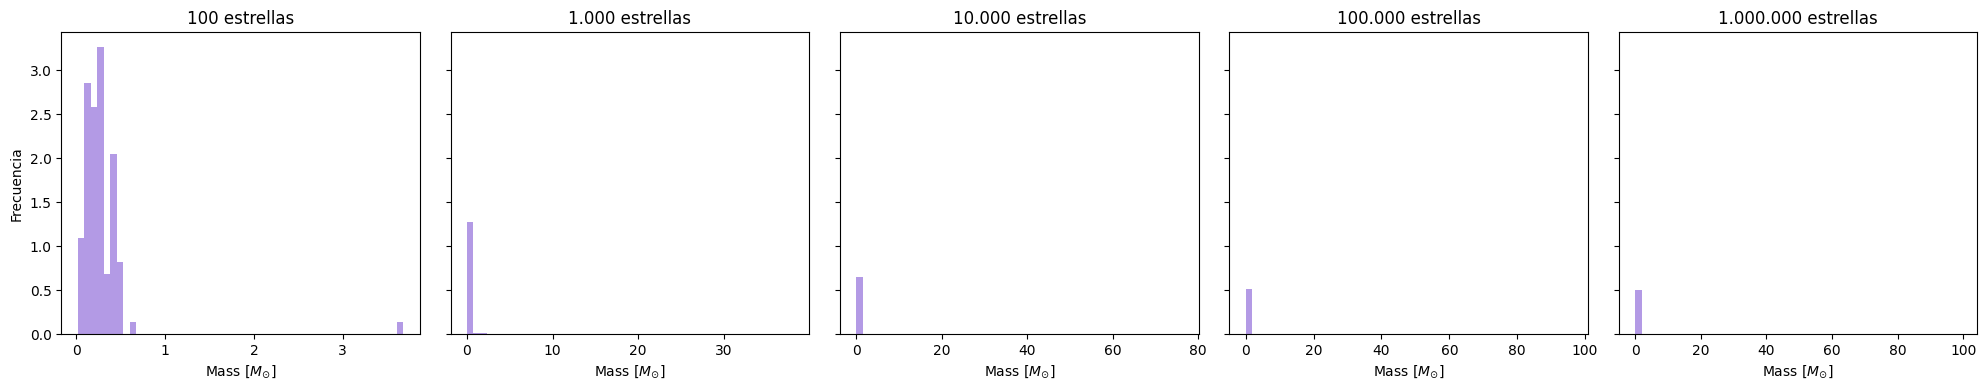

In [206]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(20, 4))
titles = ['100 estrellas', '1.000 estrellas', '10.000 estrellas', '100.000 estrellas', '1.000.000 estrellas']

for i, (masa, title) in enumerate(zip(masas_list, titles)):
    axs[i].hist(masa, bins=50, color='mediumpurple', alpha=0.7, density=True)
    axs[i].set_title(title)
    axs[i].set_xlabel('Mass [$M_{\odot}$]')
    
    if i == 0:
        axs[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()



In [207]:
# ahora, aplicamos la IMF de kroupa a las estrellas
imf_values_list = [np.array([kroupa_imf(m) for m in masas]) for masas in masas_list]

imf_values1, imf_values2, imf_values3, imf_values4, imf_values5 = imf_values_list


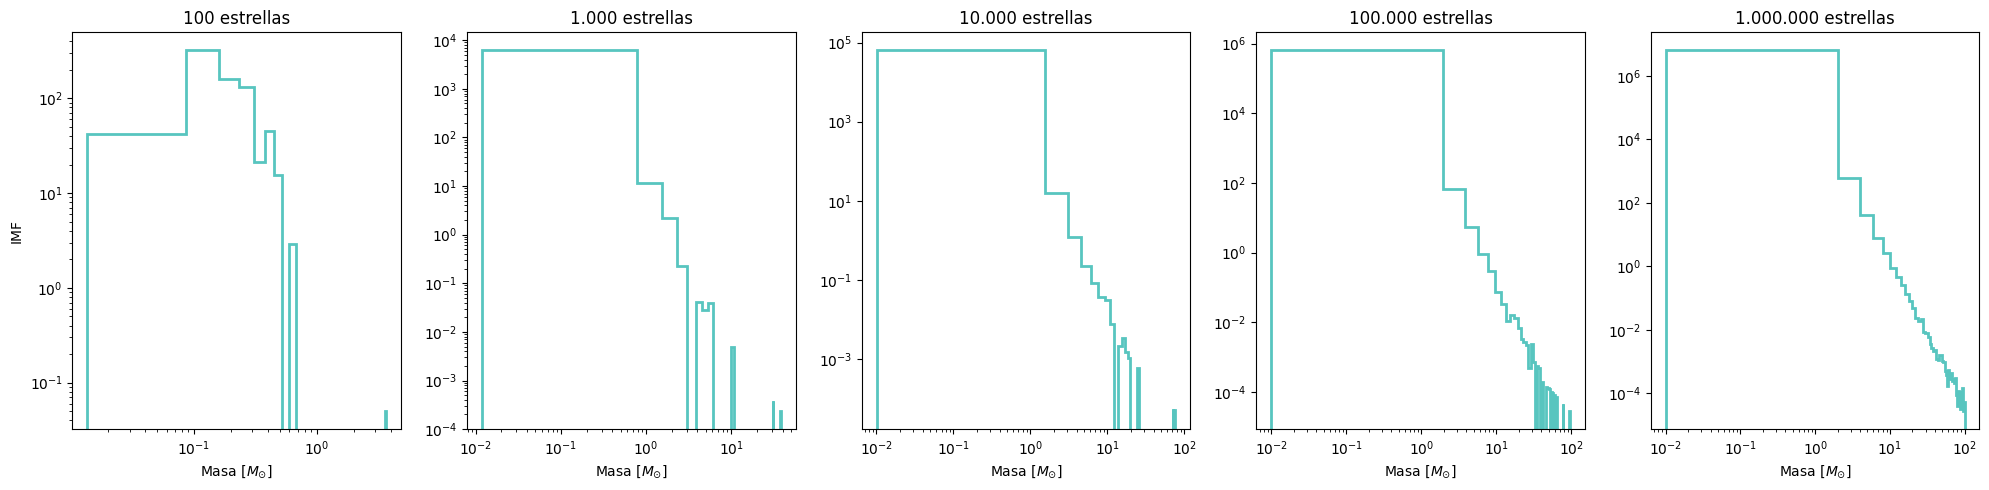

In [208]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# histogramas 
for i, (masas, imf_values, title) in enumerate(zip(masas_list, imf_values_list, titles)):
    axs[i].hist(masas, bins=50, weights=imf_values, histtype='step', lw=2, color='lightseagreen', alpha=0.75)
    axs[i].set_yscale('log')
    axs[i].set_xscale('log')
    axs[i].set_title(title)
    axs[i].set_xlabel('Masa [$M_{\odot}$]')
    if i == 0:
        axs[i].set_ylabel('IMF')

plt.tight_layout()
plt.show()

In [209]:
# funcion para darle año de nacimiento 
def birth_t(num_stars):
    birth_times = np.random.uniform(0, 10, num_stars) # 10 Gyr
    return birth_times
birth_times_list = [birth_t(n_stars) for n_stars in n_stars_list]


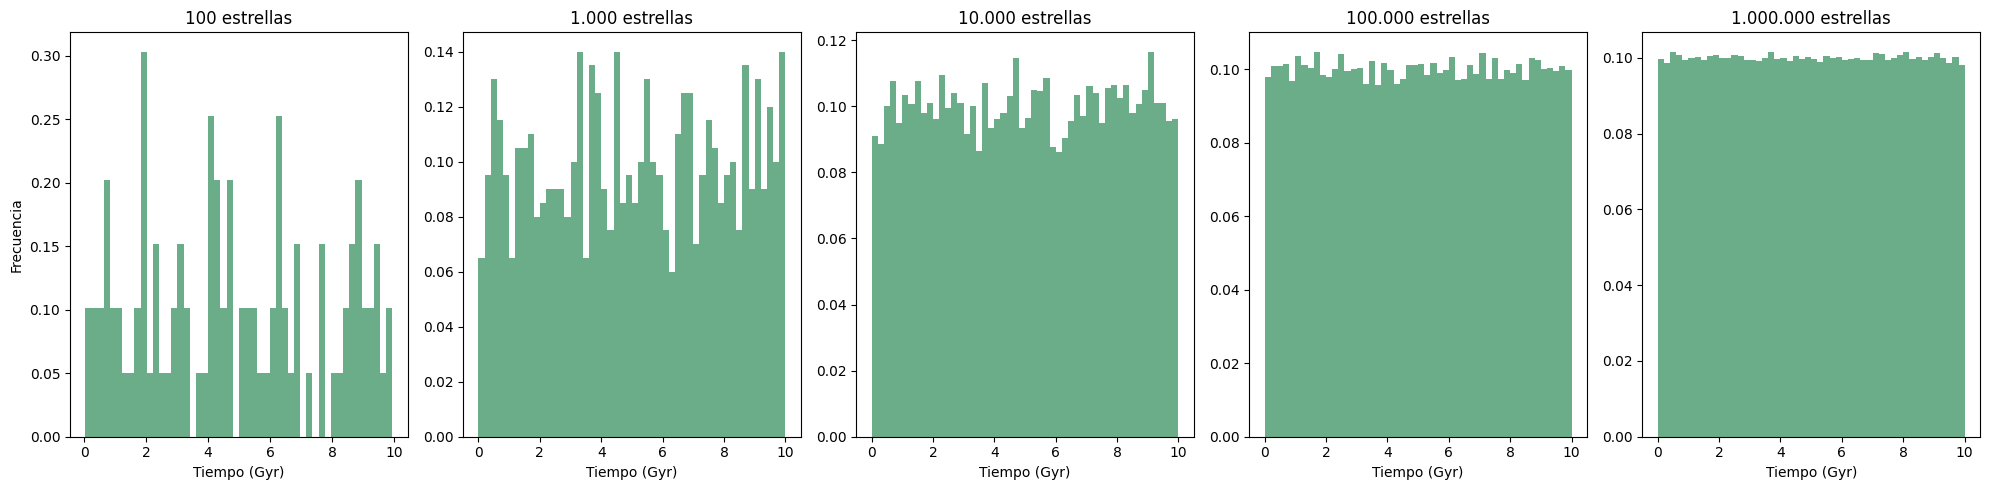

In [226]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))  


# tamaños de población estelar
for i, (num_stars, title) in enumerate(zip(n_stars_list, titles)):
    birth_times = birth_t(num_stars)
    axs[i].hist(birth_times, bins=50, color='seagreen', alpha=0.7, density=True)
    axs[i].set_title(title)
    axs[i].set_xlabel('Tiempo (Gyr)')
    if i == 0:
        axs[i].set_ylabel('Frecuencia')

plt.tight_layout() 
plt.show()

In [211]:
t_sun = 10**10  # tiempo de vida en la secuencia principal del sol en años

# función para calcular el tiempo en la secuencia principal de cada masa
def main_sequence(masas):
    return t_sun / (masas**2.5)

TMS_list = [main_sequence(masas) for masas in masas_list]  # lista de tiempos en secuencia principal
ages_list = [(t_sun - birth_times * 10**9) for birth_times in birth_times_list]  # lista de edades en años


# determinar si la estrella es un remanente estelar
resultados = []
for masas, TMS, ages, title in zip(masas_list, TMS_list, ages_list, titles):
    stellar_remnants = ages > TMS
    num_remnants = np.sum(stellar_remnants)
    num_alive = len(masas) - num_remnants
    resultados.append((title, num_alive, num_remnants))

for title, num_alive, num_remnants in resultados:
    print(f"Para {title}: Estrellas en la MS: {num_alive}, Remanentes estelares: {num_remnants}")


Para 100 estrellas: Estrellas en la MS: 99, Remanentes estelares: 1
Para 1.000 estrellas: Estrellas en la MS: 980, Remanentes estelares: 20
Para 10.000 estrellas: Estrellas en la MS: 9843, Remanentes estelares: 157
Para 100.000 estrellas: Estrellas en la MS: 98495, Remanentes estelares: 1505
Para 1.000.000 estrellas: Estrellas en la MS: 985441, Remanentes estelares: 14559


In [212]:
# función para clasificar el tipo de remanente
def class_remnant(mass):
    if mass > 20:
        return 'Agujero Negro'
    elif 8 <= mass <= 20:
        return 'Estrella de Neutrones'
    else:
        return 'Enana Blanca'

In [213]:
remnant_counts_dict = {}
remnant_masses_dict = {'Enana Blanca': [], 'Estrella de Neutrones': [], 'Agujero Negro': []}


for masas, birth_times, title in zip(masas_list, birth_times_list, titles):
    TMS = main_sequence(masas)
    ages = t_sun - birth_times * 10**9

    stellar_remnants = ages > TMS
    remnants_types = np.array([class_remnant(m) for m in masas[stellar_remnants]])
    
    remnant_counts_dict[title] = Counter(remnants_types)

    for mass, remnant_type in zip(masas[stellar_remnants], remnants_types):
        remnant_masses_dict[remnant_type].append(mass)

    print(f"Remanentes en {title}: {remnant_counts_dict[title]}")

Remanentes en 100 estrellas: Counter({'Enana Blanca': 1})
Remanentes en 1.000 estrellas: Counter({'Enana Blanca': 17, 'Agujero Negro': 2, 'Estrella de Neutrones': 1})
Remanentes en 10.000 estrellas: Counter({'Enana Blanca': 136, 'Estrella de Neutrones': 17, 'Agujero Negro': 4})
Remanentes en 100.000 estrellas: Counter({'Enana Blanca': 1381, 'Estrella de Neutrones': 85, 'Agujero Negro': 39})
Remanentes en 1.000.000 estrellas: Counter({'Enana Blanca': 13139, 'Estrella de Neutrones': 1030, 'Agujero Negro': 390})


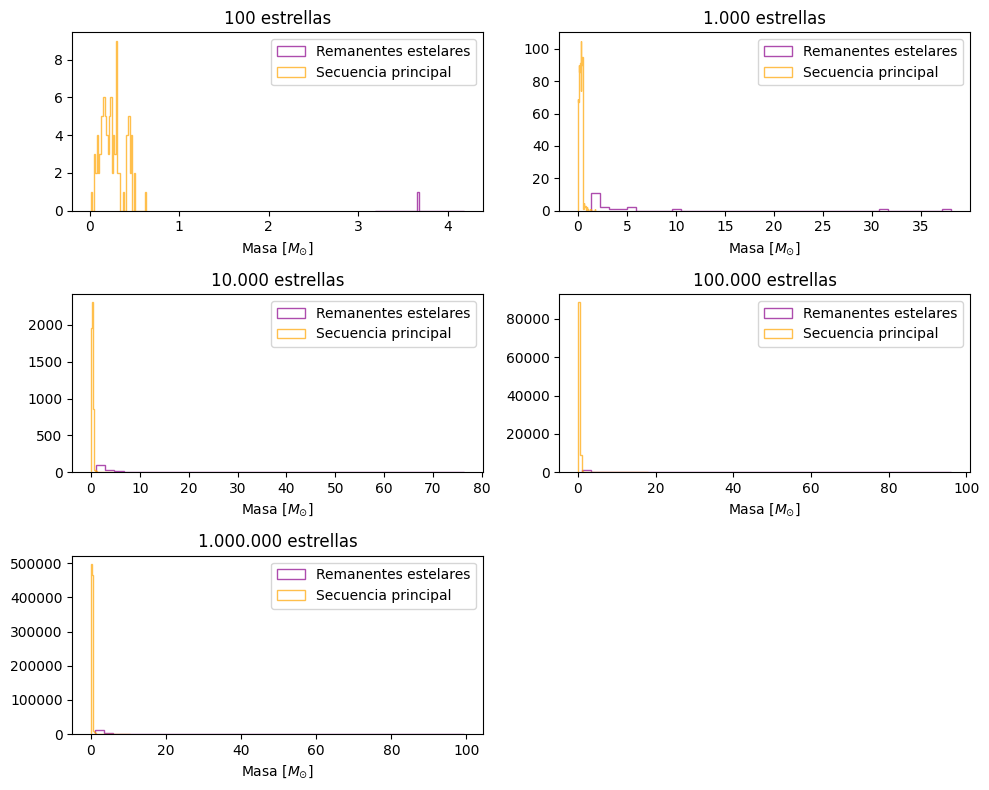

In [214]:
plt.figure(figsize=(10, 8))
for i, (masas, birth_times, title) in enumerate(zip(masas_list, birth_times_list, titles), 1):
    TMS = main_sequence(masas)
    ages = t_sun - birth_times * 10**9
    stellar_remnants = ages > TMS
    
    plt.subplot(3, 2, i)
    plt.hist(masas[stellar_remnants], bins=40, color='darkmagenta', alpha=0.7, histtype='step', label='Remanentes estelares')
    plt.hist(masas[~stellar_remnants], bins=40, color='orange', alpha=0.7, histtype='step', label='Secuencia principal')
    plt.title(title)
    plt.xlabel('Masa [$M_{\odot}$]')
    plt.legend()

plt.tight_layout()
plt.show()

In [215]:
white_dwarf_final_masses = {}

for masas, birth_times, title in zip(masas_list, birth_times_list, n_stars_list):
    TMS = main_sequence(masas)
    ages = t_sun - birth_times * 10**9

    stellar_remnants = ages > TMS
    remnants_types = np.array([class_remnant(m) for m in masas[stellar_remnants]])

    white_dwarf_masses = masas[stellar_remnants][remnants_types == 'Enana Blanca']
    white_dwarf_final_masses[title] = 0.109 * white_dwarf_masses + 0.309

for title, masses in white_dwarf_final_masses.items():
    print(f"Masa final de Enanas Blancas en simulación de {title} estrellas: {masses}")

Masa final de Enanas Blancas en simulación de 100 estrellas: [0.71053551]
Masa final de Enanas Blancas en simulación de 1000 estrellas: [0.47501184 0.48128917 0.5516986  0.50066299 0.90808911 0.82389779
 0.46631326 0.5936811  0.58741884 0.7491613  0.48467819 0.45855783
 0.9080898  0.52461655 0.54105764 0.51816434 0.51817399]
Masa final de Enanas Blancas en simulación de 10000 estrellas: [0.46878458 0.49577853 0.47293179 0.45727204 0.48470177 0.51499143
 0.48848333 0.91172473 0.54659679 0.43858417 0.62371718 0.48094887
 0.60964414 0.46462373 0.54956774 0.93891864 0.64755773 0.64489395
 0.45742345 0.65106682 0.43151526 0.51728818 0.42984258 0.99676714
 0.42430862 0.44158101 0.49944255 0.4395876  0.48049861 0.82848568
 0.44937933 0.68902881 0.5289227  0.5241506  0.7811442  0.51403584
 0.44959325 0.73027867 0.71764042 0.52386485 0.98422128 0.45093697
 0.43316304 0.66921046 0.55102533 0.49027784 0.44958399 0.43693704
 0.98912862 0.54153184 0.72176372 0.57255669 0.48778783 0.56115635
 0.5321

In [217]:
def neutron_star_mass(M_ZAMS):
    if 9 <= M_ZAMS <= 13:
        return 2.24 + 0.508 * (M_ZAMS - 14.75) + 0.125 * (M_ZAMS - 14.75)**2 + 0.0110 * (M_ZAMS - 14.75)**3
    elif 15 <= M_ZAMS < 17.8:
        return 0.996 + 0.0384 * M_ZAMS
    elif 17.8 < M_ZAMS < 18.5:
        return -0.020 + 0.10 * M_ZAMS
    else:
        return None
    
neutron_star_final_masses = {}

for masas, birth_times, title in zip(masas_list, birth_times_list, n_stars_list):
    TMS = main_sequence(masas)
    ages = t_sun - birth_times * 10**9

    stellar_remnants = ages > TMS
    remnants_types = np.array([class_remnant(m) for m in masas[stellar_remnants]])

    neutron_star_masses = masas[stellar_remnants][remnants_types == 'Estrella de Neutrones']
    final_masses = []
    for M_ZAMS in neutron_star_masses:
        final_mass = neutron_star_mass(M_ZAMS)
        if final_mass is not None:  
            final_masses.append(final_mass)
    neutron_star_final_masses[title] = np.array(final_masses)

for title, masses in neutron_star_final_masses.items():
    print(f"Masa final de Estrellas de Neutrones en simulación de {title} estrellas: {masses}")

    


Masa final de Estrellas de Neutrones en simulación de 100 estrellas: []
Masa final de Estrellas de Neutrones en simulación de 1000 estrellas: [1.4732344]
Masa final de Estrellas de Neutrones en simulación de 10000 estrellas: [1.64226445 1.6056261  1.49736976 1.607208   1.47089395 1.4126709
 1.4657746  1.53887108 1.51787459 1.45468387 1.49245315]
Masa final de Estrellas de Neutrones en simulación de 100000 estrellas: [1.55762789 1.381612   1.38527493 1.76731857 1.52264201 1.55489492
 1.58742347 1.55856768 1.50992204 1.61577546 1.49602987 1.58086695
 1.63768516 1.40228805 1.6311444  1.59176919 1.58495306 1.5189724
 1.5172072  1.51609675 1.66217095 1.4185168  1.6657896  1.53306778
 1.59298882 1.40418437 1.47601767 1.49719159 1.64222091 1.60255593
 1.42665546 1.65462718 1.66127448 1.57923148 1.54008761 1.76260733
 1.47658427 1.60308619 1.44205601 1.44960505 1.78681072 1.51845422
 1.65189628 1.48421814 1.50043935 1.60388511 1.60527456 1.41550169
 1.40888522 1.66703417 1.50542294 1.39631268 

In [218]:
def black_hole_mass(M_ZAMS):
    if 15 <= M_ZAMS <= 25.97:
        return -2.049 + 0.4140 * M_ZAMS
    elif 25.97 < M_ZAMS <= 40:
        return 15.52 - 0.3294 * (M_ZAMS - 25.97) - 0.02121 * (M_ZAMS - 25.97)**2 + 0.003120 * (M_ZAMS - 25.97)**3
    elif 45 <= M_ZAMS <= 120:
        return 5.697 + 7.8598 * M_ZAMS * 10**8 * (M_ZAMS)**-4.858
    else:
        return None  

black_hole_final_masses = {}

for masas, birth_times, title in zip(masas_list, birth_times_list, n_stars_list):
    TMS = main_sequence(masas)
    ages = t_sun - birth_times * 10**9

    stellar_remnants = ages > TMS
    remnants_types = np.array([class_remnant(m) for m in masas[stellar_remnants]])

    black_hole_masses = masas[stellar_remnants][remnants_types == 'Agujero Negro']
    final_masses = []
    for M_ZAMS in black_hole_masses:
        final_mass = black_hole_mass(M_ZAMS)
        if final_mass is not None:  
            final_masses.append(final_mass)
    black_hole_final_masses[title] = np.array(final_masses)

for title, masses in black_hole_final_masses.items():
    print(f"Masa final de Agujeros Negros en simulación de {title} estrellas: {masses}")


Masa final de Agujeros Negros en simulación de 100 estrellas: []
Masa final de Agujeros Negros en simulación de 1000 estrellas: [13.9462436  13.73455643]
Masa final de Agujeros Negros en simulación de 10000 estrellas: [61.61074853  8.41685627 48.54290982 54.82211767]
Masa final de Agujeros Negros en simulación de 100000 estrellas: [ 15.25081098  14.38955067   6.73303462   7.00840792   6.35659194
  13.79100127   8.02869677 136.76478694  15.05133701   6.86521057
 113.49624263   7.59536625 205.87282518  14.22419092   6.34525322
   8.46652619  13.2479362    7.24603318  13.81888996  13.84000517
   7.58064299  13.92294849 254.34246452   8.67064748   8.07820158
   6.61856842  13.89627258  14.13290986  13.42313044  45.11327241
 154.9377133   89.45225274  13.35820521   6.69396276   8.67724227
  13.1083427  274.78923808  23.35600858]
Masa final de Agujeros Negros en simulación de 1000000 estrellas: [ 14.14691297 174.67421842 114.28664776 173.45385406  31.51314957
  63.66483108  13.52931562  25.2

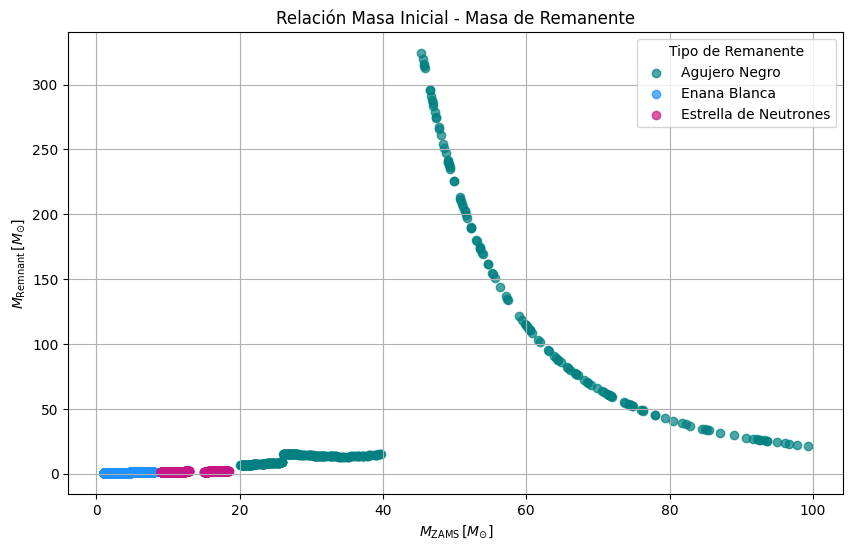

In [223]:
# masas iniciales (M_ZAMS) y finales (M_remnant)
mzams_values = []
remnant_masses = []
remnant_types = []

for masas, birth_times, title in zip(masas_list, birth_times_list, titles):
    TMS = main_sequence(masas)
    ages = t_sun - birth_times * 10**9
    stellar_remnants = ages > TMS
    
    for mass in masas[stellar_remnants]:
        remnant_type = class_remnant(mass)
        
        if remnant_type == 'Enana Blanca':
            final_mass = 0.109 * mass + 0.309
        elif remnant_type == 'Estrella de Neutrones':
            final_mass = neutron_star_mass(mass)
        elif remnant_type == 'Agujero Negro':
            final_mass = black_hole_mass(mass)
        else:
            continue
        
        if final_mass is not None:
            mzams_values.append(mass)
            remnant_masses.append(final_mass)
            remnant_types.append(remnant_type)

mzams_values = np.array(mzams_values)
remnant_masses = np.array(remnant_masses)
remnant_types = np.array(remnant_types)

plt.figure(figsize=(10, 6))
colors = {'Enana Blanca': 'dodgerblue', 'Estrella de Neutrones': 'mediumvioletred', 'Agujero Negro': 'teal'}

for remnant in np.unique(remnant_types):
    plt.scatter(mzams_values[remnant_types == remnant], 
                remnant_masses[remnant_types == remnant], 
                label=remnant, color=colors[remnant], alpha=0.7)

plt.xlabel('$M_{\\text{ZAMS}} \, [M_{\odot}]$')
plt.ylabel('$M_{\\text{Remnant}} \, [M_{\odot}]$')
plt.legend(title="Tipo de Remanente")
plt.title('Relación Masa Inicial - Masa de Remanente')
plt.grid(True)
plt.show()
